Coefficients: [2.98038815]
Mean squared error: 0.5270534129562146
Coefficient of determination (R^2): 0.38330048992709154
Accuracy: 38.33%


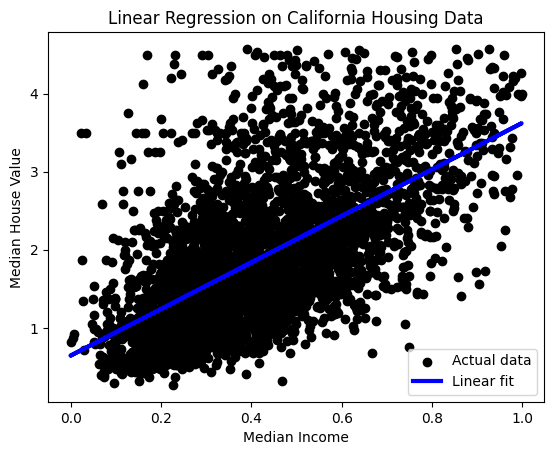

In [82]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import  MinMaxScaler
from scipy import stats
import pandas as pd


# Load the California housing dataset
housing = fetch_california_housing(as_frame=True)

# DATA CLEANING
# For simplicity, use only one feature: 'Median Income'
X = housing.frame[['MedInc']]
y = housing.target

# Combine X and y into a single DataFrame
data = pd.concat([X, y], axis=1)

# Step 1: Remove outliers using IQR for 'MedInc'
Q1 = data['MedInc'].quantile(0.25)
Q3 = data['MedInc'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers in 'MedInc'
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers in 'MedInc'
data = data[(data['MedInc'] >= lower_bound) & (data['MedInc'] <= upper_bound)]


# Step 2: Remove outliers using Z-score for 'MedInc'
z_scores = np.abs(stats.zscore(data['MedInc']))
data = data[z_scores < 3]

# Step 3: Remove outliers using IQR for 'MedHouseVal'
Q1_house = data['MedHouseVal'].quantile(0.25)
Q3_house = data['MedHouseVal'].quantile(0.75)
IQR_house = Q3_house - Q1_house

# Define the bounds for outliers in 'MedHouseVal'
lower_bound_house = Q1_house - 1.5 * IQR_house
upper_bound_house = Q3_house + 1.5 * IQR_house

# Filter out outliers in 'MedHouseVal'
data = data[(data['MedHouseVal'] >= lower_bound_house) & (data['MedHouseVal'] <= upper_bound_house)]

# Step 4: Remove outliers using Z-score for 'MedHouseVal'
z_scores_house = np.abs(stats.zscore(data['MedHouseVal']))
data = data[z_scores_house < 3]

# Normalization
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(data[['MedInc']])
y = data['MedHouseVal']

# Normalization
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(data[['MedInc']])
y = data['MedHouseVal']

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients:', regr.coef_)

# The mean squared error
print('Mean squared error:', np.mean((y_pred - y_test) ** 2))

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred)
print('Coefficient of determination (R^2):', r2)

# Print the accuracy in percentage
print('Accuracy: {:.2f}%'.format(r2 * 100))

# Plot outputs
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Linear fit')

plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Linear Regression on California Housing Data')
plt.legend()
plt.show()

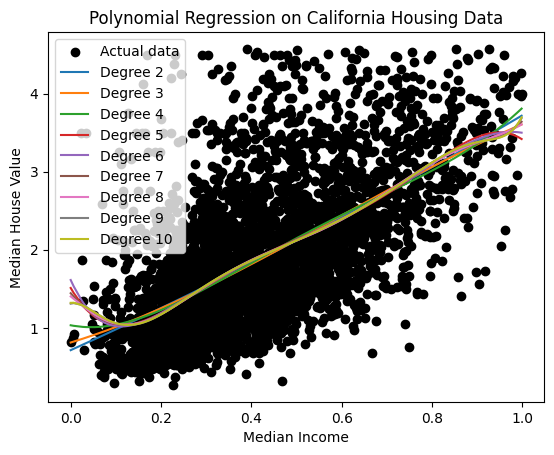

Mean Squared Error for each polynomial degree:
Degree 2: MSE = 0.5267992466423599, R^2 = 0.3835978871877449, Accuracy = 38.36%
Degree 3: MSE = 0.5270521364853978, R^2 = 0.38330198351181743, Accuracy = 38.33%
Degree 4: MSE = 0.526485562267029, R^2 = 0.38396492588976006, Accuracy = 38.40%
Degree 5: MSE = 0.5251377425125525, R^2 = 0.38554199523760857, Accuracy = 38.55%
Degree 6: MSE = 0.5248548176976499, R^2 = 0.38587304250995114, Accuracy = 38.59%
Degree 7: MSE = 0.5247902997449203, R^2 = 0.3859485342701051, Accuracy = 38.59%
Degree 8: MSE = 0.5248165248792664, R^2 = 0.38591784852345157, Accuracy = 38.59%
Degree 9: MSE = 0.5247688268456647, R^2 = 0.3859736594777695, Accuracy = 38.60%
Degree 10: MSE = 0.5247925991436646, R^2 = 0.38594584376845154, Accuracy = 38.59%


In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import operator  # Importing the operator module
from sklearn.preprocessing import  MinMaxScaler
from scipy import stats
import pandas as pd

# Load the California housing dataset
housing = fetch_california_housing(as_frame=True)
# DATA CLEANING
# For simplicity, use only one feature: 'Median Income'
X = housing.frame[['MedInc']]
y = housing.target

# Combine X and y into a single DataFrame
data = pd.concat([X, y], axis=1)

# DATA CLEANING
# For simplicity, use only one feature: 'Median Income'
X = housing.frame[['MedInc']]
y = housing.target

# Combine X and y into a single DataFrame
data = pd.concat([X, y], axis=1)

# Step 1: Remove outliers using IQR for 'MedInc'
Q1 = data['MedInc'].quantile(0.25)
Q3 = data['MedInc'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers in 'MedInc'
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers in 'MedInc'
data = data[(data['MedInc'] >= lower_bound) & (data['MedInc'] <= upper_bound)]


# Step 2: Remove outliers using Z-score for 'MedInc'
z_scores = np.abs(stats.zscore(data['MedInc']))
data = data[z_scores < 3]

# Step 3: Remove outliers using IQR for 'MedHouseVal'
Q1_house = data['MedHouseVal'].quantile(0.25)
Q3_house = data['MedHouseVal'].quantile(0.75)
IQR_house = Q3_house - Q1_house

# Define the bounds for outliers in 'MedHouseVal'
lower_bound_house = Q1_house - 1.5 * IQR_house
upper_bound_house = Q3_house + 1.5 * IQR_house

# Filter out outliers in 'MedHouseVal'
data = data[(data['MedHouseVal'] >= lower_bound_house) & (data['MedHouseVal'] <= upper_bound_house)]

# Step 4: Remove outliers using Z-score for 'MedHouseVal'
z_scores_house = np.abs(stats.zscore(data['MedHouseVal']))
data = data[z_scores_house < 3]


# Normalization
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(data[['MedInc']])
y = data['MedHouseVal']

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up polynomial degrees to test
degrees = [2, 3, 4,5,6,7,8,9,10]

# Dictionary to store MSE for each degree
metrics_dict = {}

# Plotting the actual data
plt.scatter(X_test, y_test, color='black', label='Actual data')

# Iterating over specified degrees to create polynomial regression models
for degree in degrees:
    # Creating a pipeline that first transforms features into polynomial features, then fits LinearRegression
    polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    # Training the model
    polynomial_model.fit(X_train, y_train)

    # Predicting on the testing set
    y_pred = polynomial_model.predict(X_test)

    # Calculating and storing MSE
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics_dict[degree] = (mse, r2)

    # Sorting X_test and y_pred for plotting
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X_test, y_pred), key=sort_axis)
    X_test_sorted, y_pred_sorted = zip(*sorted_zip)

    # Plotting polynomial regression lines
    plt.plot(X_test_sorted, y_pred_sorted, label=f'Degree {degree}')

# Adding labels and title to the plot
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Polynomial Regression on California Housing Data')
plt.legend()
plt.show()

# Printing MSE for each polynomial degree
print("Mean Squared Error for each polynomial degree:")
for degree, (mse, r2) in metrics_dict.items():
    print(f"Degree {degree}: MSE = {mse}, R^2 = {r2}, Accuracy = {r2 * 100:.2f}%")

Results for Linear Regression:
  R2 Score: 0.38330048992709154
  Accuracy: 38.33%
  MSE: 0.5270534129562146

Results for Ridge Regression:
  Lambda: 0.001
    R2 Score: 0.38330050192373133
    Accuracy: 38.33%
    MSE: 0.5270534027034579
    Coefficients: [2.98038288]

  Lambda: 0.01
    R2 Score: 0.38330060978180935
    Accuracy: 38.33%
    MSE: 0.5270533105240948
    Coefficients: [2.98033545]

  Lambda: 0.1
    R2 Score: 0.383301677310091
    Accuracy: 38.33%
    MSE: 0.5270523981763223
    Coefficients: [2.97986125]

  Lambda: 1
    R2 Score: 0.3833112512045519
    Accuracy: 38.33%
    MSE: 0.5270442159843983
    Coefficients: [2.9751275]

  Lambda: 10
    R2 Score: 0.383300613018426
    Accuracy: 38.33%
    MSE: 0.5270533077579667
    Coefficients: [2.92860424]

Results for Lasso Regression:
  Lambda: 0.001
    R2 Score: 0.3833299209691625
    Accuracy: 38.33%
    MSE: 0.5270282601371884
    Coefficients: [2.95317715]

  Lambda: 0.01
    R2 Score: 0.38066808382695716
    Accuracy:

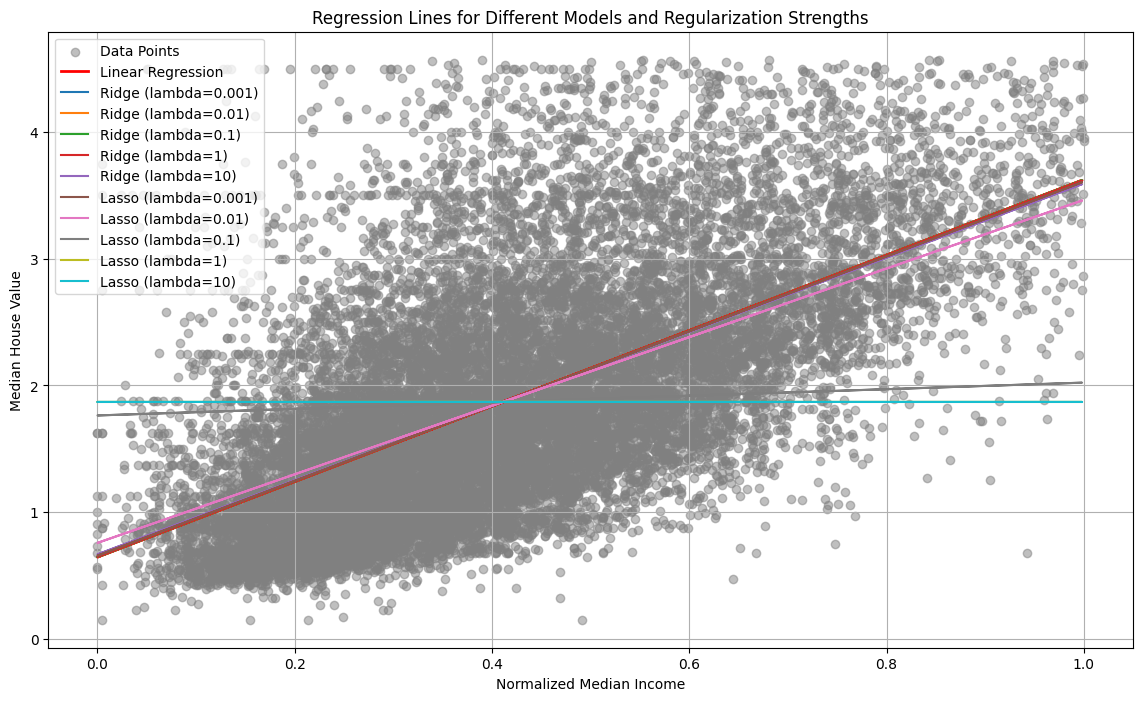

In [83]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import numpy as np
from sklearn.preprocessing import  MinMaxScaler
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Load the California housing dataset
housing = fetch_california_housing(as_frame=True)
# DATA CLEANING
# For simplicity, use only one feature: 'Median Income'
X = housing.frame[['MedInc']]
y = housing.target

# Combine X and y into a single DataFrame
data = pd.concat([X, y], axis=1)

# DATA CLEANING
# For simplicity, use only one feature: 'Median Income'
X = housing.frame[['MedInc']]
y = housing.target

# Combine X and y into a single DataFrame
data = pd.concat([X, y], axis=1)

# Step 1: Remove outliers using IQR for 'MedInc'
Q1 = data['MedInc'].quantile(0.25)
Q3 = data['MedInc'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers in 'MedInc'
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers in 'MedInc'
data = data[(data['MedInc'] >= lower_bound) & (data['MedInc'] <= upper_bound)]


# Step 2: Remove outliers using Z-score for 'MedInc'
z_scores = np.abs(stats.zscore(data['MedInc']))
data = data[z_scores < 3]

# Step 3: Remove outliers using IQR for 'MedHouseVal'
Q1_house = data['MedHouseVal'].quantile(0.25)
Q3_house = data['MedHouseVal'].quantile(0.75)
IQR_house = Q3_house - Q1_house

# Define the bounds for outliers in 'MedHouseVal'
lower_bound_house = Q1_house - 1.5 * IQR_house
upper_bound_house = Q3_house + 1.5 * IQR_house

# Filter out outliers in 'MedHouseVal'
data = data[(data['MedHouseVal'] >= lower_bound_house) & (data['MedHouseVal'] <= upper_bound_house)]

# Step 4: Remove outliers using Z-score for 'MedHouseVal'
z_scores_house = np.abs(stats.zscore(data['MedHouseVal']))
data = data[z_scores_house < 3]


# Normalization
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(data[['MedInc']])
y = data['MedHouseVal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a dictionary to store the results
results = {
    'Linear': {'r2_score': None, 'mse': None},
    'Ridge': {},
    'Lasso': {}
}

# Regularization strengths
lambdas = [0.001, 0.01, 0.1, 1, 10]

# Train and evaluate a baseline Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
results['Linear']['r2_score'] = r2_score(y_test, y_pred_linear)
results['Linear']['mse'] = mean_squared_error(y_test, y_pred_linear)

# Function to train and evaluate models with regularization
def train_eval_model(Model, lambdas, X_train, y_train, X_test, y_test, model_name):
    for lam in lambdas:
        model = Model(alpha=lam)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[model_name][lam] = {
            'r2_score': r2_score(y_test, y_pred),
            'mse': mean_squared_error(y_test, y_pred),
            'coefficients': model.coef_
        }

# Evaluate Ridge and Lasso models with different regularization strengths
train_eval_model(Ridge, lambdas, X_train, y_train, X_test, y_test, 'Ridge')
train_eval_model(Lasso, lambdas, X_train, y_train, X_test, y_test, 'Lasso')

# Display results
for model in ['Linear', 'Ridge', 'Lasso']:
    print(f"Results for {model} Regression:")
    if model == 'Linear':
        print(f"  R2 Score: {results['Linear']['r2_score']}")
        print(f"  Accuracy: {results['Linear']['r2_score'] * 100:.2f}%")
        print(f"  MSE: {results['Linear']['mse']}\n")
    else:
        for lam in lambdas:
            print(f"  Lambda: {lam}")
            print(f"    R2 Score: {results[model][lam]['r2_score']}")
            print(f"    Accuracy: {results[model][lam]['r2_score'] * 100:.2f}%")
            print(f"    MSE: {results[model][lam]['mse']}")
            print(f"    Coefficients: {results[model][lam]['coefficients']}\n")

# Plotting the data points and the linear lines
plt.figure(figsize=(14, 8))

# Plot data points
plt.scatter(X, y, color='gray', alpha=0.5, label='Data Points')

# Plot Linear Regression line
plt.plot(X_test, y_pred_linear, color='blue', linewidth=2, label='Linear Regression')

# Plot Ridge Regression lines for different lambdas
for lam in lambdas:
    ridge_model = Ridge(alpha=lam)
    ridge_model.fit(X_train, y_train)
    plt.plot(X_test, ridge_model.predict(X_test), label=f'Ridge (lambda={lam})')

# Plot Lasso Regression lines for different lambdas
for lam in lambdas:
    lasso_model = Lasso(alpha=lam)
    lasso_model.fit(X_train, y_train)
    plt.plot(X_test, lasso_model.predict(X_test), label=f'Lasso (lambda={lam})')

# Labels and legend
plt.xlabel('Normalized Median Income')
plt.ylabel('Median House Value')
plt.title('Regression Lines for Different Models and Regularization Strengths')
plt.legend()
plt.grid(True)
plt.show()

**Scenario on Handling Multicollinearity**: Imagine you are working with a dataset intended to predict housing prices based on features like size, location, age of the property, and proximity to amenities.During your analysis, you discover significant multicollinearity between the size of the house and its age. Describe the steps you would take to address this issue. Which specific techniques or metrics would you use to confirm and mitigate multicollinearity to ensure the stability and interpretability of your model?

**Scenario on Model Evaluation Metrics**: You have developed a multiple linear regression model to forecast quarterly sales based on advertising spend, seasonal effects, and economic conditions. The model has an R-squared of 0.85, but your client is concerned about the reliability of predictions. Discuss how you would use MSE and RMSE in this scenario to evaluate model performance further. Explain the implications of these metrics and how they might influence your recommendations for model adjustments or client expectations.